In [16]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

In [17]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'DESeq2'”
Old packages: 'backports', 'brio', 'cpp11', 'credentials', 'devtools', 'fs',
  'glue', 'memoise', 'openssl', 'pkgbuild', 'pkgload', 'readr', 'remotes',
  'stringi', 'vroom', 'withr', 'xml2', 'nlme'



In [9]:
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
library("DESeq2")
library("pheatmap")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

In [18]:
info <- read.table("ALL.info", header = TRUE, row.names="sample")
counts <- as.matrix(read.table("ALL.counts", header = TRUE, row.names="geneID"))

In [19]:
head(counts)

,c1,c2,c3,r1,r2,r3
ENSMUSG00000000001.4,3431,3504,4031,4489,3919,5700
ENSMUSG00000000003.15,0,0,0,0,0,0
ENSMUSG00000000028.15,150,136,152,345,273,468
ENSMUSG00000000031.16,55526,48225,56064,64504,33249,64992
ENSMUSG00000000037.17,41,44,52,77,68,87
ENSMUSG00000000049.11,10,8,10,4,1,1


In [20]:
head(info)

,id,condition
,<chr>,<chr>
c1,SRR3414635,control
c2,SRR3414636,control
c3,SRR3414637,control
r1,SRR3414629,reprogramming
r2,SRR3414630,reprogramming
r3,SRR3414631,reprogramming


,id,condition
,<chr>,<chr>
c1,SRR3414635,control
c2,SRR3414636,control
c3,SRR3414637,control
r1,SRR3414629,reprogramming
r2,SRR3414630,reprogramming
r3,SRR3414631,reprogramming


In [22]:
dds <- DESeqDataSetFromMatrix(countData = counts, colData = info, design = ~ condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [23]:
# Tell the DDS which columns correspond to the 'reference' level of gene expression

dds$condition <- relevel(dds$condition, ref="control")

dds <- DESeq(dds)
res <- results(dds, alpha=0.01)   # Specify a more strict threshold on padj. This threshold is called 'alpha'

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



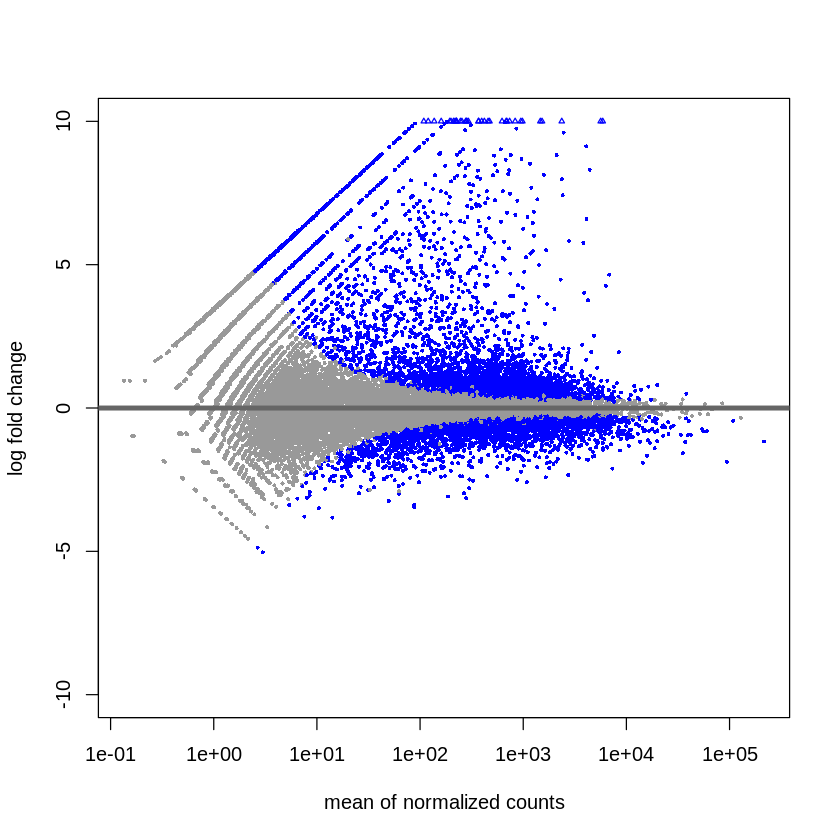

In [24]:
plotMA(res, ylim=c(-10,10))

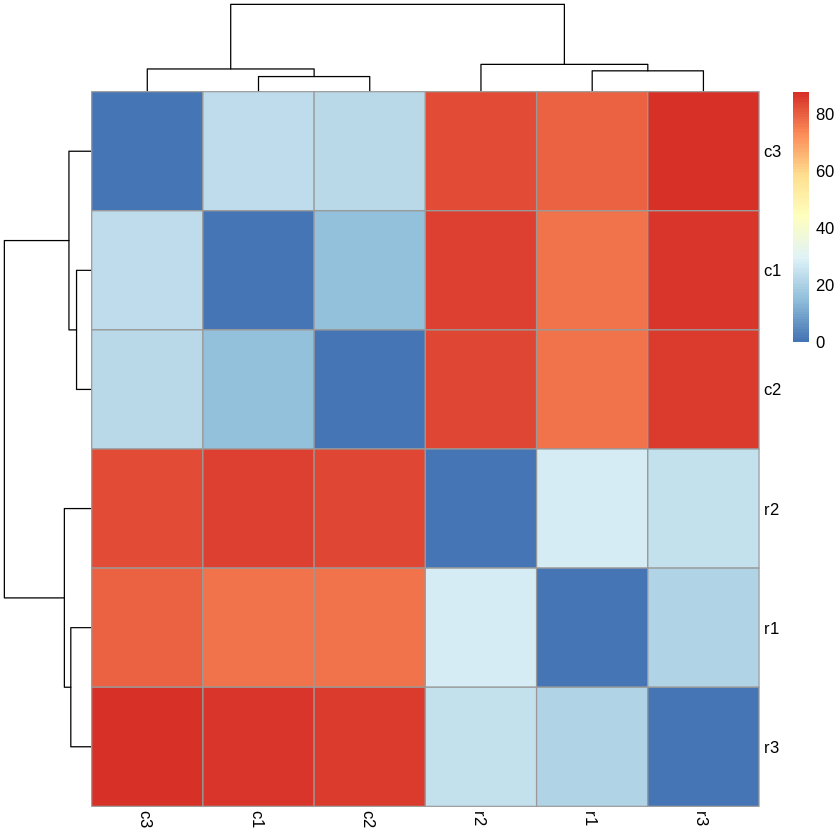

In [25]:
rld <- rlog(dds)
sampleDists <- dist(t(assay(rld)))
sampleDistsMatrix <- as.matrix(sampleDists)
pheatmap(sampleDistsMatrix, clustering_distance_rows = sampleDists, clustering_distance_cols = sampleDists)

In [26]:
resOrdered <- res[order(res$padj),]
resSignificant <- subset(resOrdered, padj < 0.01)
write.table(resSignificant, "differentially_expressed_genes.txt", sep = "\t", row.names = TRUE, quote = FALSE)

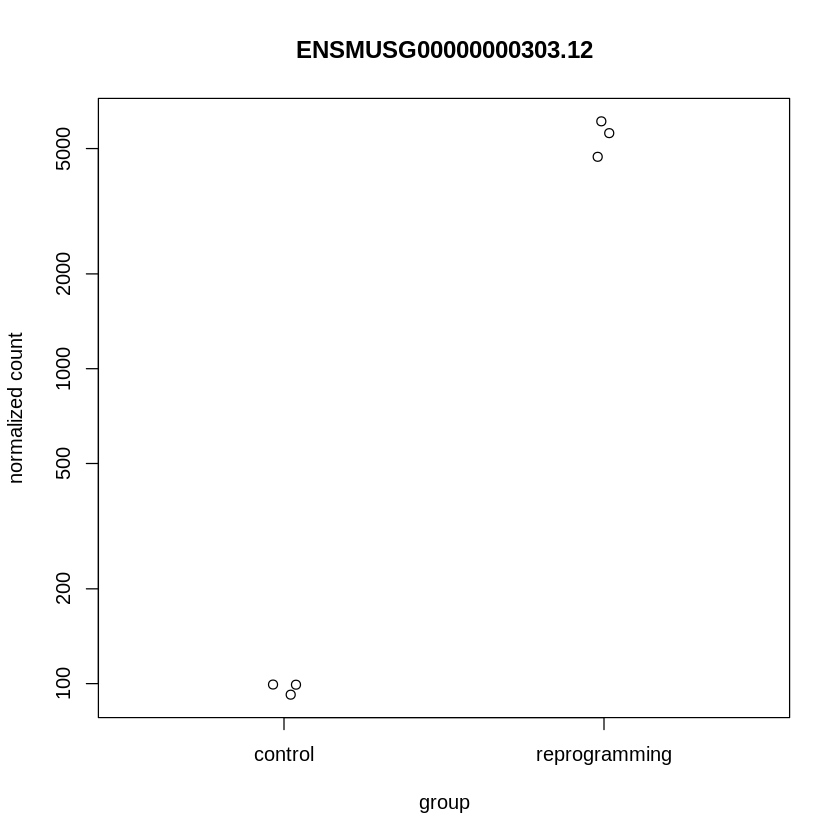

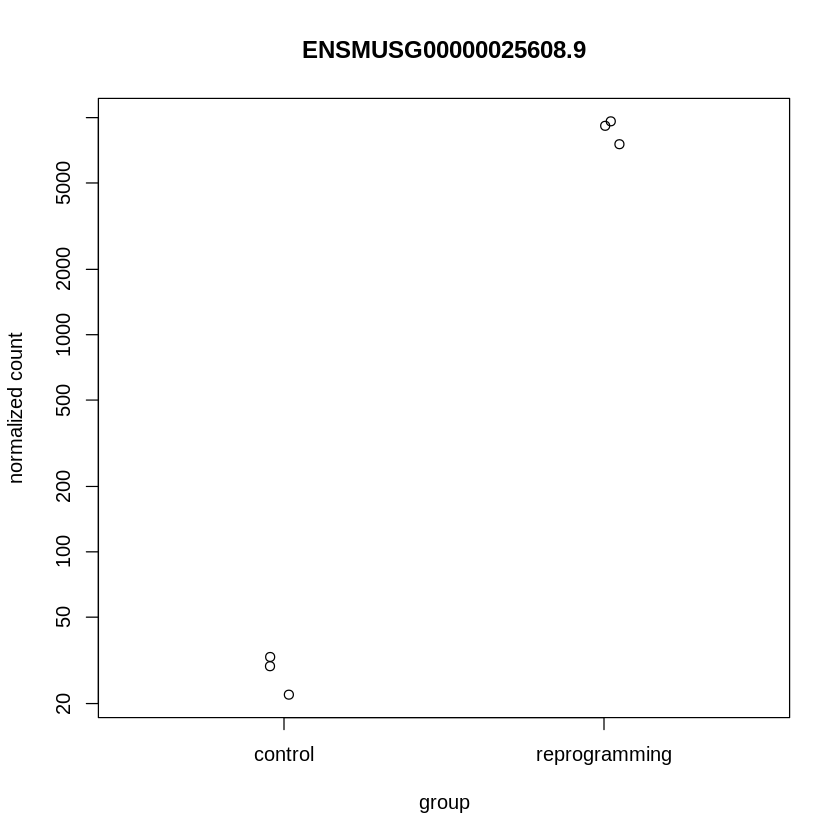

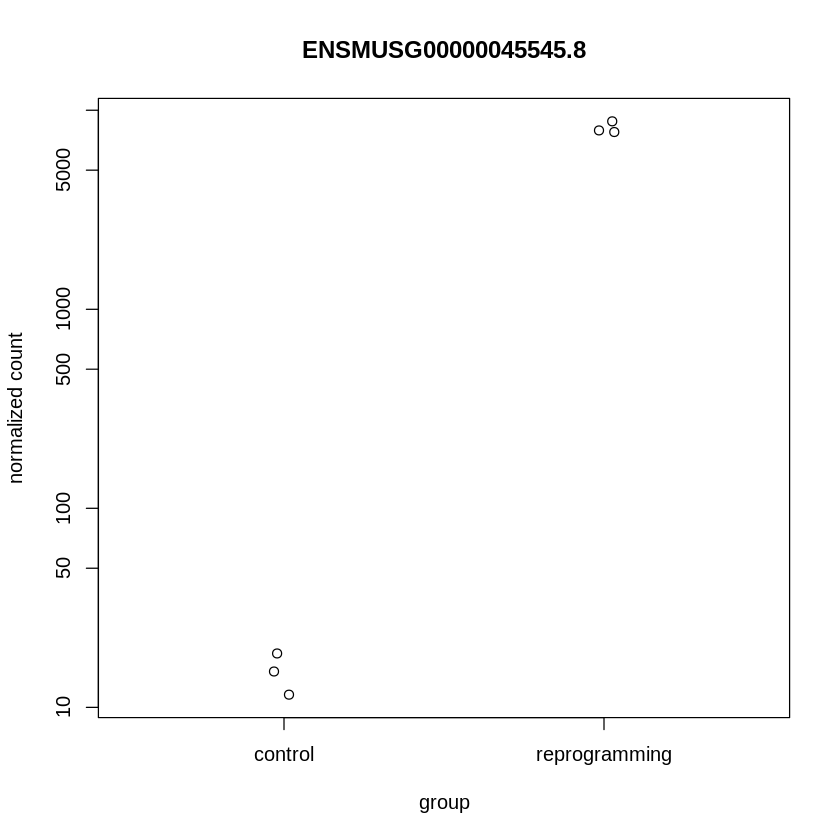

In [28]:
select = order(res$padj)[1:20]
plotCounts(dds, gene=select[1], intgroup="condition")
plotCounts(dds, gene=select[2], intgroup="condition")
plotCounts(dds, gene=select[3], intgroup="condition")